# Test flattened dT 

In [17]:
# System tools  
import sys
from pathlib import Path
import warnings
warnings.filterwarnings("ignore") # suppress warnings

# Python stack 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import awkward as ak

# ML tools
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve

# Internal modules 
sys.path.extend(["../../src/core", "../../src/utils"])
from draw import Draw
from io_manager import Load

# pyutils 
from pyutils.pyplot import Plot
plotter = Plot() # just use this for styles

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


## Load data

In [10]:
!ls -ltrh ../../output/dt/

total 0
drwxr-xr-x. 3 sgrant fnalgrid 1 Dec  2 19:56 cosmic
drwxr-xr-x. 3 sgrant fnalgrid 1 Dec  2 20:00 test


In [18]:
!ls -ltrh ../../output/dt/test
!ls -ltrh ../../output/dt/test/data
!ls -ltrh ../../output/dt/test/data/*

total 0
drwxr-xr-x. 5 sgrant fnalgrid 3 Dec  2 20:03 data
total 0
drwxr-xr-x. 2 sgrant fnalgrid 4 Dec  2 20:00 test_CRY
drwxr-xr-x. 2 sgrant fnalgrid 4 Dec  2 20:00 test_sig_mix2BB
drwxr-xr-x. 2 sgrant fnalgrid 4 Dec  2 20:03 test_CRY_mix2BB
../../output/dt/test/data/test_CRY:
total 359K
-rw-r--r--. 1 sgrant fnalgrid 116K Dec  2 20:03 results.pkl
-rw-r--r--. 1 sgrant fnalgrid 1.3K Dec  2 20:03 cut_flow.csv
-rw-r--r--. 1 sgrant fnalgrid 224K Dec  2 20:03 hists.h5
-rw-r--r--. 1 sgrant fnalgrid  18K Dec  2 20:03 events.parquet

../../output/dt/test/data/test_sig_mix2BB:
total 1.7M
-rw-r--r--. 1 sgrant fnalgrid 1.1M Dec  2 20:00 results.pkl
-rw-r--r--. 1 sgrant fnalgrid 1.3K Dec  2 20:00 cut_flow.csv
-rw-r--r--. 1 sgrant fnalgrid 224K Dec  2 20:00 hists.h5
-rw-r--r--. 1 sgrant fnalgrid 336K Dec  2 20:00 events.parquet

../../output/dt/test/data/test_CRY_mix2BB:
total 363K
-rw-r--r--. 1 sgrant fnalgrid 119K Dec  2 20:03 results.pkl
-rw-r--r--. 1 sgrant fnalgrid 1.3K Dec  2 20:03 cut_flow.cs

In [24]:
run = "test"
base_in_path = Path(f"../../output/dt/{run}/data/")

# Load both test datasets
cry_path = base_in_path / "test_CRY"
cry_mix2bb_path = base_in_path / "test_CRY_mix2BB"

print(f"Loading CRY data from: {cry_path}")
cry_data = Load(in_path=cry_path).load_pkl()["events"]

print(f"Loading CRY mix2BB data from: {ce_mix2bb_path}")
cry_mix_data = Load(in_path=ce_mix2bb_path).load_pkl()["events"]

print(f"CRY events: {len(cry_data)}")
print(f"CRY mix2BB events: {len(cry_mix_data)}")

Loading CRY data from: ../../output/dt/test/data/test_CRY
[Load] ✅ Initialised with out_path=../../output/dt/test/data/test_CRY
[Load] ✅ Successfully loaded results from ../../output/dt/test/data/test_CRY/results.pkl
Loading CRY mix2BB data from: ../../output/dt/test/data/test_CRY_mix2BB
[Load] ✅ Initialised with out_path=../../output/dt/test/data/test_CRY_mix2BB
[Load] ✅ Successfully loaded results from ../../output/dt/test/data/test_CRY_mix2BB/results.pkl
CRY events: 28
CRY mix2BB events: 43


In [30]:
## Add duration
cry_data["duration"] = cry_data["timeEnd"] - cry_data["timeStart"]
cry_mix_data["duration"] = cry_mix_data["timeEnd"] - cry_mix_data["timeStart"]

## Verify data

In [31]:
from pyutils.pyprint import Print
printer = Print()
printer.print_n_events(cry_data, n_events=2)
printer.print_n_events(cry_mix_data, n_events=2)

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 2 event(s)...

-------------------------------------------------------------------------------------
event: 82816.0
subrun: 10915.0
run: 1202.0
dT: 57.2442429186342
crv_x: 1270.4461669921875
crv_y: 2706.404296875
crv_z: -6046.51220703125
PEs: 621.5787963867188
nHits: 16.0
nLayers: 4.0
angle: -0.3634093999862671
timeStart: 865.920654296875
timeEnd: 953.420654296875
crv_time: 846.0923461914062
PEs_per_hit: 38.84867477416992
t0: 903.3365891100404
d0: 22.013242721557617
tanDip: 0.8568083047866821
maxr: 612.6860961914062
mom_mag: 120.59320831298828
duration: 87.5
-------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------
event: 145641.0
subrun: 10931.0
run: 1202.0
dT: 61.11087740379264
crv_x: -2581.091064453125
crv_y: 2002.7777099609375
crv_z: -5918.68798828125
PEs: 839.3943481445312
nHit

In [15]:
# cry_data["events"]

## Duration plots

In [16]:
ce_mix_data["events"]["duration"] = ce_mix_data["events"]["timeEnd"] - ce_mix_data["events"]["timeStart"]

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


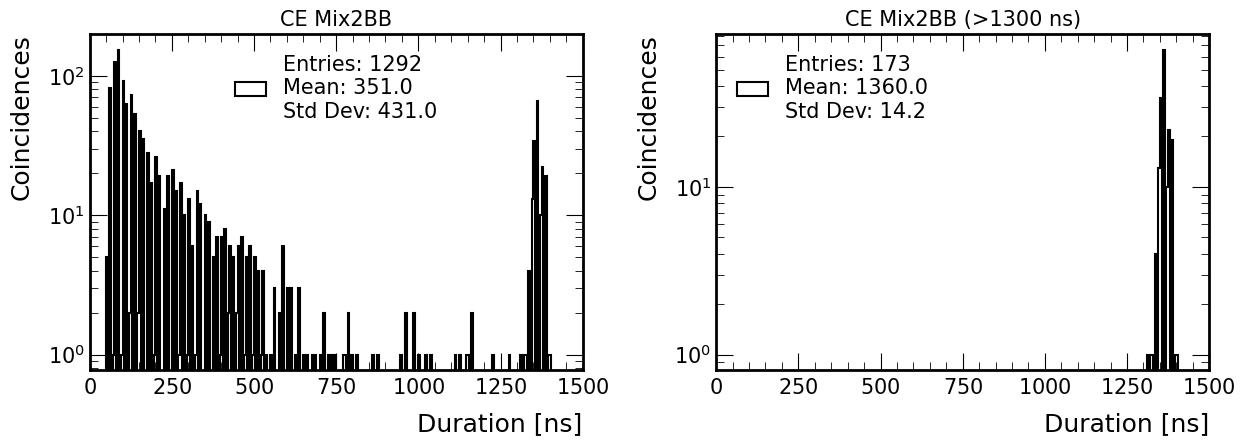

In [34]:
from pyutils.pyplot import Plot
plotter = Plot()

fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 4.8))


plotter.plot_1D(
    ak.flatten(ce_mix_data["events"]["duration"], axis=None), 
    nbins=300, 
    xmin=0,
    xmax=1500,
    log_y=True,
    show=False,
    xlabel="Duration [ns]", 
    ylabel="Coincidences",
    title="CE Mix2BB",
    ax=ax[0]
)

condition = (ce_mix_data["events"]["duration"] > 1300)

plotter.plot_1D(
    ak.flatten(ce_mix_data["events"]["duration"][condition], axis=None),
    nbins=300, 
    xmin=0,
    xmax=1500,
    log_y=True,
    show=False,
    xlabel="Duration [ns]", 
    ylabel="Coincidences",
    title="CE Mix2BB (>1300 ns)",
    ax=ax[1]
)

plt.tight_layout()
plt.show()

In [35]:
# Cut at high duration: 1300
long_pulses_data = ce_mix_data["events"][condition]

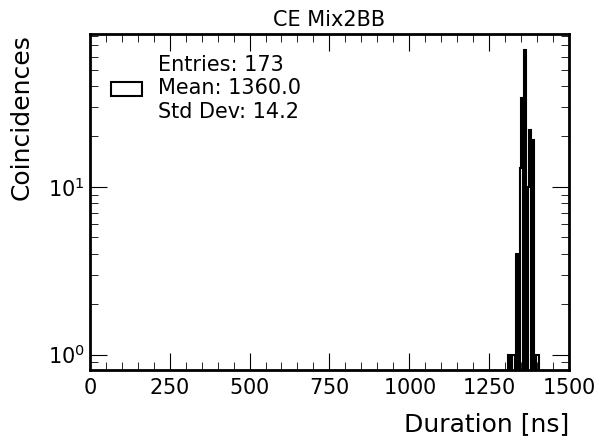

In [36]:
# duration2 = long_pulses_data["timeEnd"] - long_pulses_data["timeStart"]
plotter.plot_1D(
    ak.flatten(long_pulses_data["duration"], axis=None), 
    nbins=300, 
    xmin=0,
    xmax=1500,
    log_y=True,
    show=True,
    xlabel="Duration [ns]", 
    ylabel="Coincidences",
    title="CE Mix2BB",
)

In [38]:
from pyutils.pyprint import Print
printer = Print()
printer.print_n_events(long_pulses_data, n_events=5)

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 5 event(s)...

-------------------------------------------------------------------------------------
event: 41.0
subrun: 245.0
crv_x: 3897.810546875
crv_y: 2874.251708984375
crv_z: -9957.7998046875
PEs: 17393.751953125
dT: 589.1446173168176
nHits: 815.0
nLayers: 4.0
angle: 0.3958425521850586
timeStart: 403.98516845703125
timeEnd: 1766.485107421875
PEs_per_hit: 21.342026936349694
t0: 1619.5917608715051
d0: 54.82680892944336
tanDip: 0.6781886219978333
maxr: 595.5457153320312
mom_mag: 101.23982238769531
duration: 1362.4999389648438
-------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------
event: 113.0
subrun: 245.0
crv_x: 3871.403076171875
crv_y: 2877.845703125
crv_z: -9957.7998046875
PEs: 32647.5859375
dT: 20.573041627555767
nHits: 1342.0
nLayers: 4.0
angle: -0.38247573375701904
timeS

## Feature plots

In [27]:
help(plotter.plot_1D_overlay)

Help on method plot_1D_overlay in module pyutils.pyplot:

plot_1D_overlay(hists_dict, weights=None, nbins=100, xmin=-1.0, xmax=1.0, title=None, xlabel=None, ylabel=None, out_path=None, dpi=300, leg=True, leg_pos='best', log_x=False, log_y=False, norm_by_area=False, styles=None, ax=None, show=True) method of pyutils.pyplot.Plot instance
    Overlay multiple 1D histograms from a dictionary of arrays.

    Args:
        hists_dict (Dict[str, np.ndarray]): Dictionary mapping labels to arrays
        weights (List[np.ndarray], opt): List of weight arrays for each histogram. Defaults to None
        nbins (int, opt): Number of bins. Defaults to 100
        xmin (float, opt): Minimum x-axis value. Defaults to -1.0
        xmax (float, opt): Maximum x-axis value. Defaults to 1.0
        title (str, opt): Plot title. Defaults to None
        xlabel (str, opt): X-axis label. Defaults to None
        ylabel (str, opt): Y-axis label. Defaults to None
        out_path (str, opt): Path to save the p

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
	Wrote ../../../output/images/ml/veto/test/xgboost/features/h1o_2x3_features.png


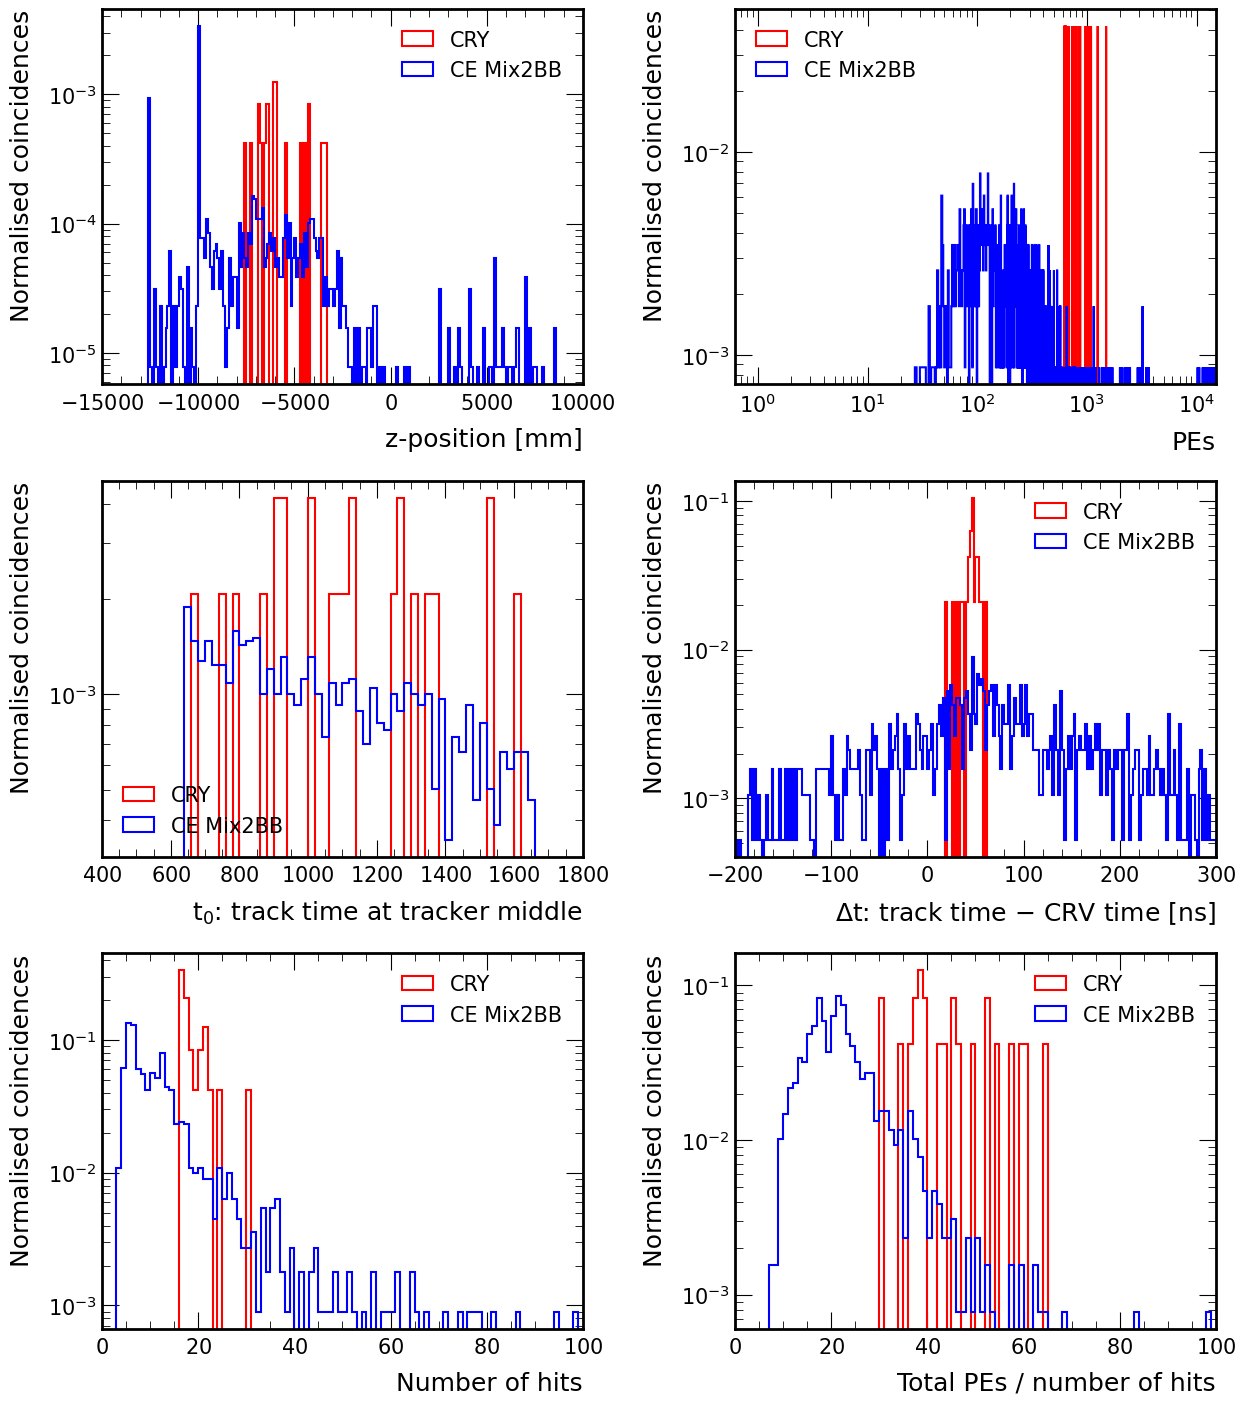

In [28]:
from pyutils.pyplot import Plot 
plotter = Plot()

fig, ax = plt.subplots(3, 2, figsize=(2*6.4, 3*4.8))

styles = {
    "CRY" : { 
        "color" : "red",# #0173B2"
        # "histtype" : "bar",
        # "alpha" : 0.4
    },
    "CE Mix2BB" : {
        "color" : "blue", # "#FF6600"
        # "histtype" : "bar",
        # "alpha" : 0.4
    }
}

# Plot 1: CRV z-position
plotter.plot_1D_overlay(
    {
        "CRY" : ak.flatten(cry_data["events"]["crv_z"], axis=-1),
        "CE Mix2BB": ak.flatten(ce_mix_data["events"]["crv_z"], axis=-1),
    },
    nbins=250,
    xmin=-15000,
    xmax=10000,
    show=False,
    ax=ax[0,0],
    log_y=True,
    xlabel="z-position [mm]", 
    ylabel="Normalised coincidences",
    norm_by_area=True,
    styles=styles
)

# Plot 2: CRV PEs
plotter.plot_1D_overlay(
    {
        "CRY" : ak.flatten(cry_data["events"]["PEs"], axis=-1),
        "CE Mix2BB": ak.flatten(ce_mix_data["events"]["PEs"], axis=-1),
    },
    nbins=int(1.5e4),
    xmin=0,
    xmax=1.5e4,
    show=False,
    ax=ax[0,1],
    log_y=True,
    log_x=True,
    xlabel="PEs", 
    ylabel="Normalised coincidences",
    norm_by_area=True,
    styles=styles
)

# Plot 3: t0
plotter.plot_1D_overlay(
    {
        "CRY" : ak.flatten(cry_data["events"]["t0"], axis=-1),
        "CE Mix2BB": ak.flatten(ce_mix_data["events"]["t0"], axis=-1),
    },
    nbins=70,
    xmin=400,
    xmax=1800,
    show=False,
    ax=ax[1,0],
    log_y=True,
    log_x=False,
    xlabel=r"$t_{0}$: track time at tracker middle", 
    ylabel="Normalised coincidences",
    norm_by_area=True,
    styles=styles
)

# Plot 4: dT
plotter.plot_1D_overlay(
    {
        "CRY" : ak.flatten(cry_data["events"]["dT"], axis=-1),
        "CE Mix2BB": ak.flatten(ce_mix_data["events"]["dT"], axis=-1),
    },
    nbins=int(250),
    xmin=-200,
    xmax=300,
    show=False,
    ax=ax[1,1],
    log_y=True,
    log_x=False,
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]", 
    ylabel="Normalised coincidences",
    norm_by_area=True,
    styles=styles
)

# Plot 5: PEs per hit (new feature)
plotter.plot_1D_overlay(
    {
        "CRY" : ak.flatten(cry_data["events"]["PEs_per_hit"], axis=-1),
        "CE Mix2BB": ak.flatten(ce_mix_data["events"]["PEs_per_hit"], axis=-1),
    },
    nbins=int(100),
    xmin=0,
    xmax=100,
    show=False,
    ax=ax[2,1],
    log_y=True,
    log_x=False,
    xlabel=r"Total PEs / number of hits", 
    ylabel="Normalised coincidences",
    norm_by_area=True,
    styles=styles
)

# Plot 6: Number of hits
plotter.plot_1D_overlay(
    {
        "CRY" : ak.flatten(cry_data["events"]["nHits"], axis=-1),
        "CE Mix2BB": ak.flatten(ce_mix_data["events"]["nHits"], axis=-1),
    },
    nbins=int(100),
    xmin=0,
    xmax=100,
    show=False,
    ax=ax[2,0],
    log_y=True,
    log_x=False,
    xlabel=r"Number of hits", 
    ylabel="Normalised coincidences",
    norm_by_area=True,
    styles=styles
)

plt.tight_layout()

img_base_path = Path(f"../../../output/images/ml/veto/{run}/xgboost")
img_feature_out_path = img_base_path / "features"
img_feature_out_path.mkdir(exist_ok=True, parents=True)
out_name = img_feature_out_path / "h1o_2x3_features.png"

plt.savefig(out_name)
print(f"\tWrote {out_name}")
plt.show()

In [11]:
# !touch ../../../output/images/ml/veto/hello

	Wrote ../../../output/images/ml/veto/test/xgboost/features/h2o_dT_vs_z.png


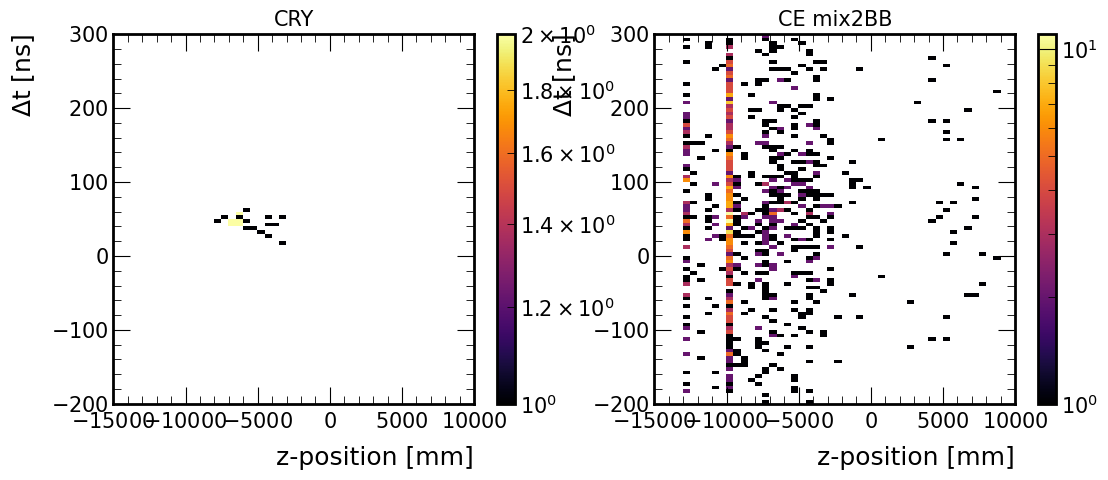

In [29]:
fig, ax = plt.subplots(1,2,figsize=(2*6.4, 4.8))
plotter.plot_2D(
    x = ak.flatten(cry_data["events"]["crv_z"], axis=-1),
    y = ak.flatten(cry_data["events"]["dT"], axis=-1),
    nbins_x=50,
    xmin=-15000,
    xmax=10000,
    nbins_y=100,
    ymin=-200,
    ymax=300,
    show=False,
    log_z=True,
    xlabel="z-position [mm]", 
    ylabel=r"$\Delta t$ [ns]", 
    title="CRY",
    ax=ax[0]
)
plotter.plot_2D(
    x = ak.flatten(ce_mix_data["events"]["crv_z"], axis=-1),
    y = ak.flatten(ce_mix_data["events"]["dT"], axis=-1),
    nbins_x=50,
    xmin=-15000,
    xmax=10000,
    nbins_y=100,
    ymin=-200,
    ymax=300,
    show=False,
    log_z=True,
    xlabel="z-position [mm]", 
    ylabel=r"$\Delta t$ [ns]", 
    title="CE mix2BB",
    ax=ax[1]
)

# img_base_path = Path(f"../../../output/images/ml/veto/{run}/xgboost")
# model_out_path = Path(f"../../../output/ml/veto/{run}/models/xgboost/features")
# img_out_path.mkdir(exist_ok=True, parents=True)
out_name = img_feature_out_path / "h2o_dT_vs_z.png"

plt.savefig(out_name)
print(f"\tWrote {out_name}")
# plt.show()

In [13]:
# !ls ../../../output/images/ml/veto/a/

## Training 

In [14]:
# Add crv_PEs_per_nHits



In [33]:
# Convert to DataFrame
df_CRY = ak.to_dataframe(cry_data["events"])
df_sig_mix = ak.to_dataframe(ce_mix_data["events"])

# Drop unused columns
col_to_drop = ["event", "subrun", "d0", "tanDip", "maxr", "mom_mag", "PEs_per_hit", "t0"] 

df_CRY.drop(columns=col_to_drop, axis=1, inplace=True)
df_sig_mix.drop(columns=col_to_drop, axis=1, inplace=True)

df_CRY["label"] = 1 # "signal"
df_sig_mix["label"] = 0 # "background"

In [35]:
# Combine and shuffle
df_train = pd.concat([df_CRY, df_sig_mix], ignore_index=True)
df_train = df_train.sample(frac=1, random_state=42).reset_index(drop=True)
display(df_train)

,crv_x,crv_y,crv_z,PEs,dT,nHits,nLayers,angle,label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,-4.547474e-13,2684.098389,-6603.041992,80.049416,263.228540,5.0,3.0,-2.557954,0
3,4.163351e+03,2870.682129,-9957.799805,219.874557,-101.654725,14.0,4.0,1.155639,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
1760,4.547474e-13,2720.045166,-3481.972900,110.048149,-496.225360,5.0,3.0,0.328395,0
1761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1762,4.370953e+03,2883.422363,-9957.799805,445.197662,-36.129929,21.0,4.0,0.908517,0
1763,0.000000e+00,2712.131104,-2763.952637,100.829956,-17.343232,6.0,3.0,0.299885,0


In [36]:
# Count NaNs per column
nan_counts = df_train.isna().sum()
print("NaN counts per column:")
print(nan_counts)

# Count events (rows) with ANY NaN
events_with_nan = df_train.isna().any(axis=1).sum()
print(f"\nEvents with at least one NaN: {events_with_nan}")

# Count events with NaN in specific column (e.g., dT)
events_with_nan_dT = df_train['dT'].isna().sum()
print(f"Events with NaN in dT: {events_with_nan_dT}")

# Show percentage
total_events = len(df_train)
print(f"Percentage with NaN in dT: {events_with_nan_dT/total_events*100:.2f}%")

NaN counts per column:
crv_x      449
crv_y      449
crv_z      449
PEs        449
dT         449
nHits      449
nLayers    449
angle      449
label        0
dtype: int64

Events with at least one NaN: 449
Events with NaN in dT: 449
Percentage with NaN in dT: 25.44%


In [37]:
# Separate by class
df = df_train
cry_events = df[df['label'] == 1]
ce_mix_events = df[df['label'] == 0]

# Count NaNs in each class
cry_with_nan = cry_events['dT'].isna().sum()
ce_mix_with_nan = ce_mix_events['dT'].isna().sum()

print(f"CRY events with NaN dT: {cry_with_nan}/{len(cry_events)}")
print(f"CE mix events with NaN dT: {ce_mix_with_nan}/{len(ce_mix_events)}")

CRY events with NaN dT: 0/24
CE mix events with NaN dT: 449/1741


In [40]:
X = df_train.drop("label", axis=1)
y = df_train["label"]

# Define feature names from actual columns
feature_names = list(X.columns)
print(f"Features: {feature_names}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining: {len(X_train)} events")
print(f"Test: {len(X_test)} events")

Features: ['crv_x', 'crv_y', 'crv_z', 'PEs', 'dT', 'nHits', 'nLayers', 'angle']

Training: 1412 events
Test: 353 events


In [41]:
# Actually not really needed for BDTs

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled")

✅ Features scaled


In [42]:
print("\n🚀 Training XGBoost model...")

model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

model.fit(X_train_scaled, y_train)

# Assign feature names for plotting / saving
model.get_booster().feature_names = feature_names

print("✅ Training complete!")


🚀 Training XGBoost model...
✅ Training complete!


## Store model

In [ ]:
!pwd

In [43]:
model_out_path = Path(f"../../../output/ml/veto/{run}/models")
model_out_path.mkdir(parents=True, exist_ok=True)


# Full path to model file
model_file_path = model_out_path / "trained_xgboost.json"

# Save the model
model.save_model(str(model_file_path))  # XGBoost often needs string path
print(f"\n✅ Done! Model saved to {model_file_path}")


✅ Done! Model saved to ../../../output/ml/veto/test/models/trained_xgboost.json


## Analyse model 

In [44]:
feature_names = model.get_booster().feature_names


⭐️ Feature importance:
  crv_x     : 0.0265
  crv_y     : 0.0095
  crv_z     : 0.1635
  PEs       : 0.2332
  dT        : 0.0455
  nHits     : 0.4557
  nLayers   : 0.0334
  angle     : 0.0326
	Wrote ../../../output/images/ml/veto/test/xgboost/validation/bar_feature_importance.png


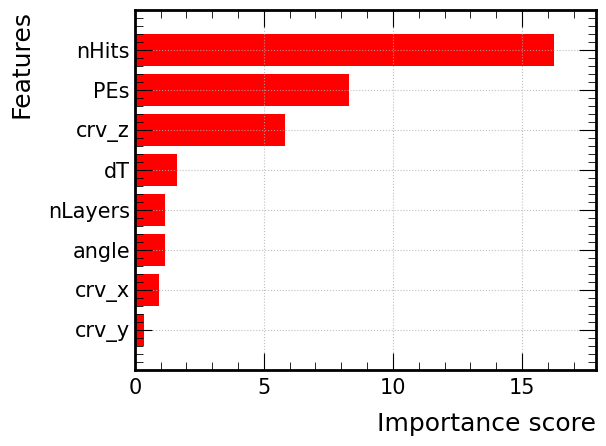

In [45]:
print("\n⭐️ Feature importance:") 
for feat, imp in zip(feature_names, model.feature_importances_):
    print(f"  {feat:10s}: {imp:.4f}") 

xgb.plot_importance(model, importance_type='gain', show_values=False, height=0.8)
plt.title("")
plt.tight_layout()

# img_base_path = Path(f"../../../output/images/ml/veto/{run}/xgboost")
img_validation_out_path = img_base_path / "validation"
img_validation_out_path.mkdir(exist_ok=True, parents=True)
out_name = img_validation_out_path / "bar_feature_importance.png"
plt.savefig(out_name)

print(f"\tWrote {out_name}")
# out_name = img_out_path / "bar_feature_importance.png" 
# plt.savefig(out_name)
plt.show()

In [46]:
train_pred = model.predict_proba(X_train_scaled)[:, 1]
test_pred = model.predict_proba(X_test_scaled)[:, 1]

train_auc = roc_auc_score(y_train, train_pred)
test_auc = roc_auc_score(y_test, test_pred)

print(f"\nTraining AUC: {train_auc:.6f}")
print(f"Test AUC: {test_auc:.6f}")


Training AUC: 1.000000
Test AUC: 1.000000


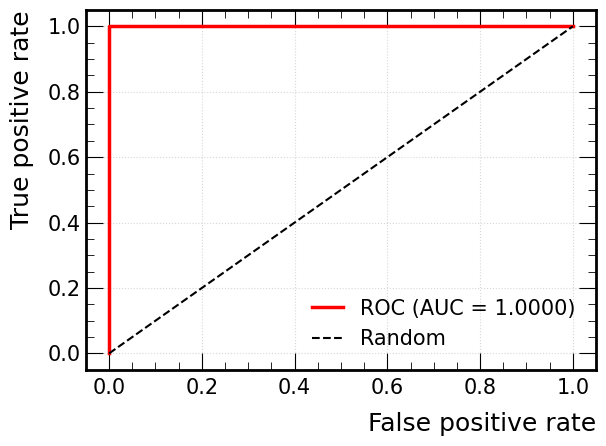


✅ Done! ROC curve saved to ../../../output/images/ml/veto/test/xgboost/validation/roc_curve.png


In [47]:
fpr, tpr, _ = roc_curve(y_test, test_pred)

plt.figure()
plt.plot(fpr, tpr, linewidth=2.5, label=f'ROC (AUC = {test_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.tight_layout()

out_name = img_validation_out_path /  "roc_curve.png"
plt.savefig(out_name)
plt.show()

print(f"\n✅ Done! ROC curve saved to {out_name}")

In [48]:
# Are there duplicate events?
print(f"Train events: {len(X_train)}")
print(f"Test events: {len(X_test)}")
print(f"Overlap: {len(set(X_train.index) & set(X_test.index))}")
print(feature_names)

Train events: 1412
Test events: 353
Overlap: 0
['crv_x', 'crv_y', 'crv_z', 'PEs', 'dT', 'nHits', 'nLayers', 'angle']


In [ ]:
print(img_validation_out_path)

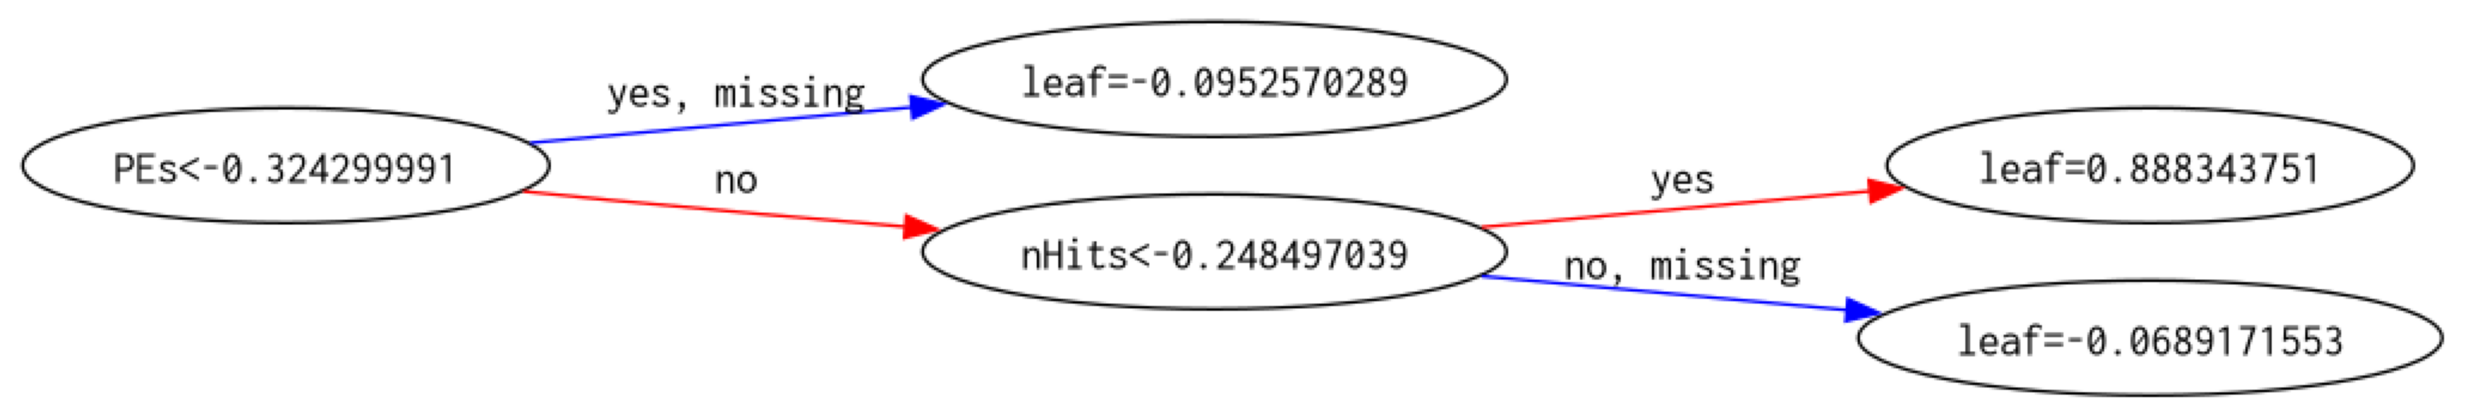


✅ Done! Tree saved to ../../../output/images/ml/veto/test/xgboost/validation/tree_mix.png


In [49]:
fig, ax = plt.subplots(figsize=(25, 25))
xgb.plot_tree(model, num_trees=0, rankdir="LR", ax=ax)
plt.tight_layout()

out_name = img_validation_out_path / "tree_mix.png"
plt.savefig(out_name)
plt.show()

print(f"\n✅ Done! Tree saved to {out_name}")

	Wrote ../../../output/images/ml/veto/test/xgboost/validation/h1o_model_output.png


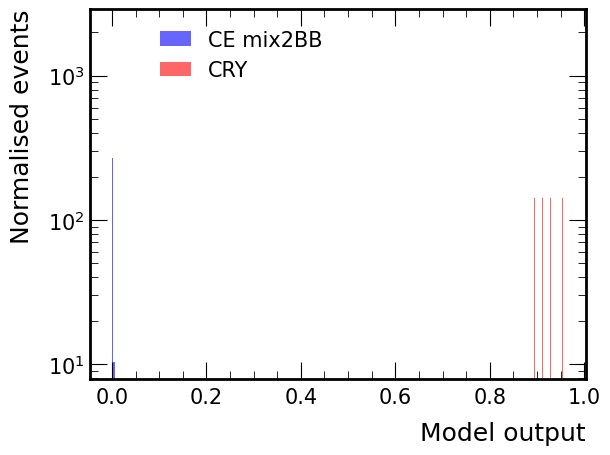

In [50]:
# Get test scores 
test_scores = model.predict_proba(X_test_scaled)[:, 1]

# Separate scores by true label
signal_scores = test_scores[y_test == 1]  # CRY
background_scores = test_scores[y_test == 0]  # CE + mix2BB

# Plot score distributions
plt.figure() 

plt.hist(background_scores, bins=100, alpha=0.6, label='CE mix2BB',
         density=True, color='blue')
plt.hist(signal_scores, bins=100, alpha=0.6, label='CRY',
         density=True, color='red')

plt.xlabel('Model output')
plt.ylabel('Normalised events')
plt.legend(loc="upper left", bbox_to_anchor=(0.1, 1))
plt.yscale('log')

out_name = img_validation_out_path / "h1o_model_output.png"
plt.savefig(out_name)
print(f"\tWrote {out_name}")
plt.show()


In [ ]:
print(img_validation_out_path)


Threshold optimisation results




,Strategy,Threshold,Veto efficiency,Deadtime,Figure of merit
0,Signal significance,0.028,100.00%,0.00%,1.0000
1,Efficiency >= 99.9%,0.000,100.00%,100.00%,0.0000
2,Balanced FOM,0.028,100.00%,0.00%,1.0000



✅ Threshold optimisation plot saved to ../../../output/images/ml/veto/test/xgboost/validation/threshold_optimisation.png


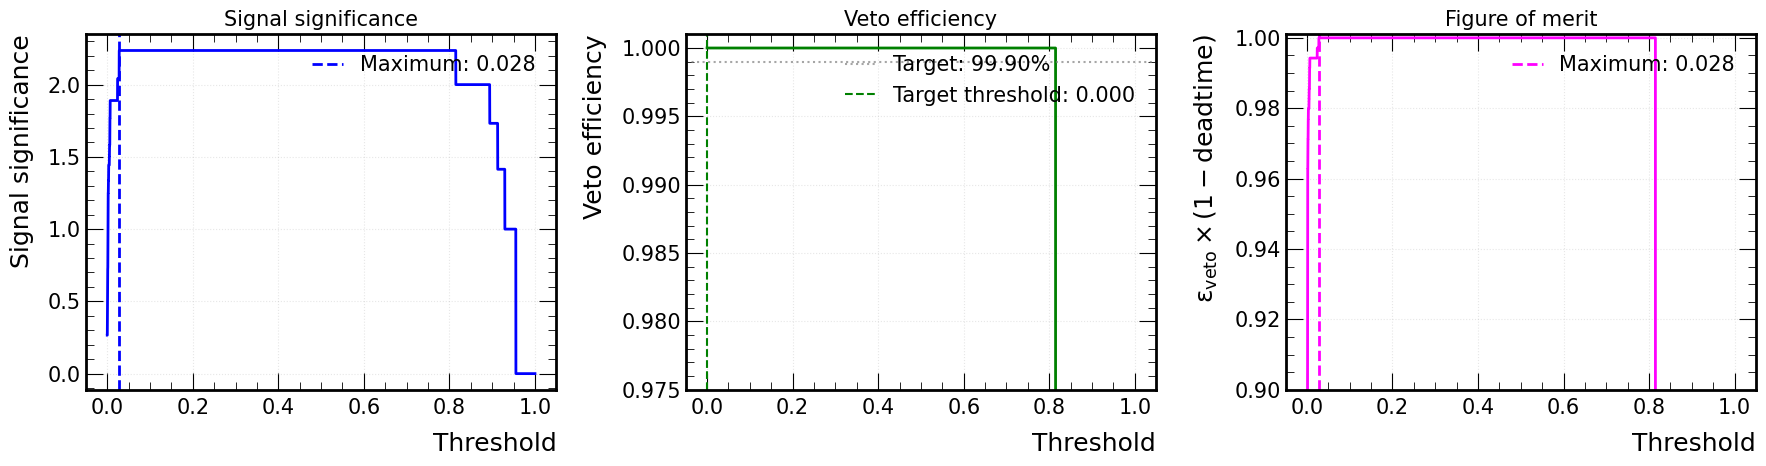

In [51]:
thresholds = np.linspace(0, 1, 10000)

# Calculate all metrics in a single loop
veto_efficiencies = []
deadtime_losses = []
significance_values = []

for thr in thresholds:
    y_pred_label = (test_pred > thr).astype(int)
    
    # Calculate confusion matrix elements
    tp = ((y_test == 1) & (y_pred_label == 1)).sum()
    fn = ((y_test == 1) & (y_pred_label == 0)).sum()
    fp = ((y_test == 0) & (y_pred_label == 1)).sum()
    tn = ((y_test == 0) & (y_pred_label == 0)).sum()
    
    # Veto efficiency and deadtime
    veto_eff = tp / (tp + fn) if (tp + fn) > 0 else 0
    deadtime = fp / (fp + tn) if (fp + tn) > 0 else 0
    
    veto_efficiencies.append(veto_eff)
    deadtime_losses.append(deadtime)
    
    # Signal significance (S/root(S+B))
    significance = tp / np.sqrt(tp + fp) if (tp + fp) > 0 else 0
    significance_values.append(significance)

# Convert to numpy arrays for easier manipulation
veto_efficiencies = np.array(veto_efficiencies)
deadtime_losses = np.array(deadtime_losses)
significance_values = np.array(significance_values)

# Strategy 1: Signal significance (S/root(S+B))
optimal_idx_significance = np.argmax(significance_values)
optimal_threshold_significance = thresholds[optimal_idx_significance]
# Metrics 
eff_significance = veto_efficiencies[optimal_idx_significance]
dt_significance = deadtime_losses[optimal_idx_significance]
max_significance = significance_values[optimal_idx_significance]

# Strategy 2: Target 99.9% efficiency 
target_efficiency = 0.999
optimal_idx_eff = np.argmin(np.abs(veto_efficiencies - target_efficiency))
optimal_threshold_eff = thresholds[optimal_idx_eff]
# Metrics
eff_eff = veto_efficiencies[optimal_idx_eff]
dt_eff = deadtime_losses[optimal_idx_eff]

# Strategy 3: Balanced figure of merit (efficiency times (1 - deadtime))
figure_of_merit = veto_efficiencies * (1 - deadtime_losses)
optimal_idx_fom = np.argmax(figure_of_merit)
optimal_threshold_fom = thresholds[optimal_idx_fom]
# Metrics 
eff_fom = veto_efficiencies[optimal_idx_fom]
dt_fom = deadtime_losses[optimal_idx_fom]
fom_fom = figure_of_merit[optimal_idx_fom]

# Create comparison DataFrame
print("\n" + "="*80)
print("Threshold optimisation results")
print("="*80)

threshold_comparison_df = pd.DataFrame({
    'Strategy': [
        'Signal significance',
        'Efficiency >= 99.9%', 
        'Balanced FOM',
    ],
    'Threshold': [
        f"{optimal_threshold_significance:.3f}",
        f"{optimal_threshold_eff:.3f}",
        f"{optimal_threshold_fom:.3f}"
    ],
    'Veto efficiency': [
        f"{eff_significance*100:.2f}%",
        f"{eff_eff*100:.2f}%",
        f"{eff_fom*100:.2f}%"
    ],
    'Deadtime': [
        f"{dt_significance*100:.2f}%",
        f"{dt_eff*100:.2f}%",
        f"{dt_fom*100:.2f}%"
    ],
    'Figure of merit': [
        f"{eff_significance * (1 - dt_significance):.4f}",
        f"{eff_eff * (1 - dt_eff):.4f}",
        f"{fom_fom:.4f}"
    ]
})

print("\n")
display(threshold_comparison_df)

# Plot comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Left: Signal significance
axes[0].plot(thresholds, significance_values, linewidth=2, color='blue')
axes[0].axvline(optimal_threshold_significance, color='blue', linestyle='--', linewidth=2,
                label=f'Maximum: {optimal_threshold_significance:.3f}')
axes[0].set_xlabel('Threshold')
axes[0].set_ylabel('Signal significance')
axes[0].set_title('Signal significance')
axes[0].legend(loc='upper right')
axes[0].grid(alpha=0.3)

# Middle: Veto efficiency vs threshold
axes[1].plot(thresholds, veto_efficiencies, linewidth=2, color='green')
axes[1].axhline(target_efficiency, color='grey', linestyle=':', linewidth=1.5, alpha=0.7,
                label=f'Target: {target_efficiency*100:.2f}%')
axes[1].axvline(optimal_threshold_eff, color='green', linestyle='--', linewidth=1.5, 
                label=f'Target threshold: {optimal_threshold_eff:.3f}')
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('Veto efficiency')
axes[1].set_title('Veto efficiency')
axes[1].set_ylim([0.975, 1.001])
axes[1].legend(loc='upper right')
axes[1].grid(alpha=0.3)

# Right: Balanced figure of merit
axes[2].plot(thresholds, figure_of_merit, linewidth=2, color='magenta')
axes[2].axvline(optimal_threshold_fom, color='magenta', linestyle='--', linewidth=2,
                label=f'Maximum: {optimal_threshold_fom:.3f}')
axes[2].set_xlabel('Threshold')
axes[2].set_ylabel(r'$\epsilon_{\text{veto}}\times(1-\text{deadtime})$')
axes[2].set_title('Figure of merit')
axes[2].set_ylim([0.9, 1.001])
axes[2].legend(loc='upper right')
axes[2].grid(alpha=0.3)

plt.tight_layout()

out_name = img_validation_out_path / "threshold_optimisation.png"
plt.savefig(out_name)
print(f"\n✅ Threshold optimisation plot saved to {out_name}")

plt.show()

In [54]:
optimal_threshold = optimal_threshold_eff


✅ Metrics overlay plot saved to ../../../output/images/ml/veto/test/xgboost/validation/threshold_metrics_overlay.png


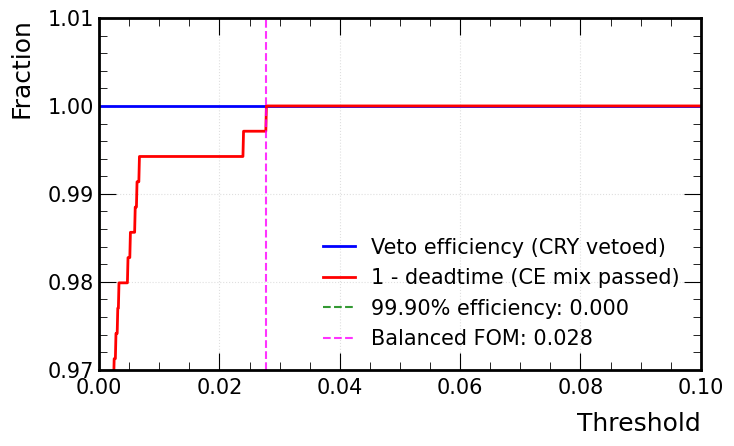

In [55]:
# Create overlay plot
fig, ax = plt.subplots(figsize=(1.2*6.4, 4.8))

ax.plot(thresholds, veto_efficiencies, linewidth=2, color='blue', label='Veto efficiency (CRY vetoed)')
ax.plot(thresholds, 1 - deadtime_losses, linewidth=2, color='red', label='1 - deadtime (CE mix passed)')

# Add vertical lines for your three strategies
ax.axvline(optimal_threshold_eff, color='green', linestyle='--', alpha=0.8, linewidth=1.5,
           label=f'{100*target_efficiency:.2f}% efficiency: {optimal_threshold_eff:.3f}')
ax.axvline(optimal_threshold_fom, color='magenta', linestyle='--', alpha=0.8, linewidth=1.5, label=f'Balanced FOM: {optimal_threshold_fom:.3f}')
# ax.axvline(optimal_threshold_significance, color='orange', linestyle=':', alpha=0.8, 
#            label=f'Signal significance: {optimal_threshold_significance:.3f}')

ax.set_xlabel('Threshold')
ax.set_ylabel('Fraction')
# ax.set_title('Performance vs threshold')
ax.set_ylim([0.97, 1.01])
ax.set_xlim([0, 0.1])
ax.legend(loc='best') # , frameon=True)
ax.grid(alpha=0.4)

plt.tight_layout()

out_name = img_validation_out_path / "threshold_metrics_overlay.png"
plt.savefig(out_name)
print(f"\n✅ Metrics overlay plot saved to {out_name}")

plt.show()

	Wrote ../../../output/images/ml/veto/test/xgboost/validation/h1o_1x2_model_output.png


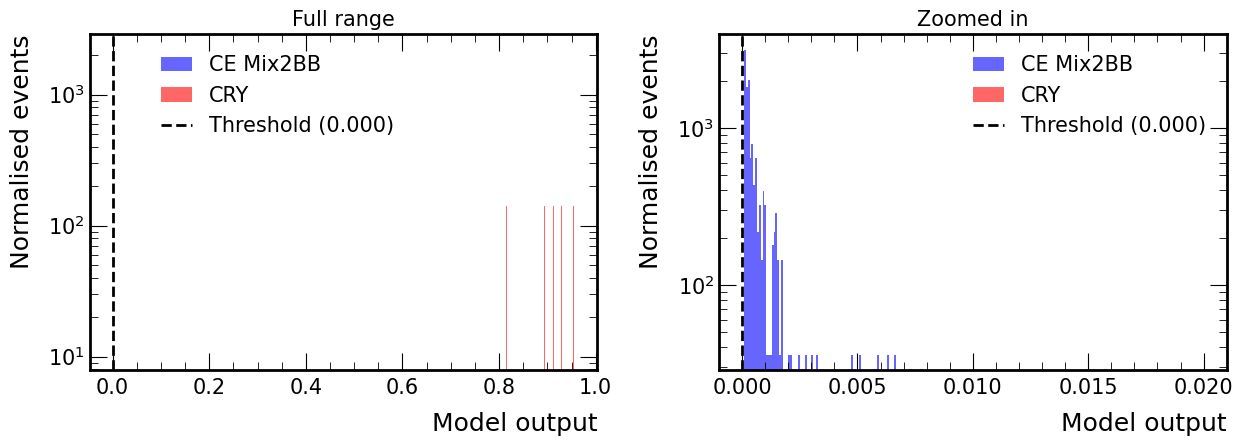

In [56]:
# Get test scores 
test_scores = model.predict_proba(X_test_scaled)[:, 1]

# Separate scores by true label
signal_scores = test_scores[y_test == 1]  # CRY
background_scores = test_scores[y_test == 0]  # CE + mix2BB

# Define threshold
threshold = optimal_threshold

# Compute FPR and FNR
false_positives = (background_scores > threshold).sum()   # Background misclassified as signal
true_negatives  = (background_scores <= threshold).sum()

false_negatives = (signal_scores <= threshold).sum()  # Signal misclassified as background
true_positives  = (signal_scores > threshold).sum()

fpr = false_positives / (false_positives + true_negatives)
fnr = false_negatives / (false_negatives + true_positives)

# Plot score distributions
fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 4.8))

nbins = 250
# Left: Full range
ax[0].hist(background_scores, bins=100, alpha=0.6, label='CE Mix2BB',
           density=True, color='blue')
ax[0].hist(signal_scores, bins=100, alpha=0.6, label='CRY',
           density=True, color='red')
ax[0].axvline(optimal_threshold, color='black', linestyle='--', linewidth=2.0, label=f"Threshold ({optimal_threshold:.3f})")
ax[0].set_xlabel('Model output')
ax[0].set_ylabel('Normalised events')
ax[0].legend(loc="upper left", bbox_to_anchor=(0.1, 1))
ax[0].set_yscale('log')
ax[0].set_title('Full range')

# Right: Zoomed in on x-axis around threshold
bins_zoom = np.linspace(0, 0.02, nbins)
ax[1].hist(background_scores, bins=bins_zoom, alpha=0.6, label='CE Mix2BB',
           density=True, color='blue')
ax[1].hist(signal_scores, bins=bins_zoom, alpha=0.6, label='CRY',
           density=True, color='red')
ax[1].axvline(optimal_threshold, color='black', linestyle='--', linewidth=2.0, label=f"Threshold ({optimal_threshold:.3f})")
ax[1].set_xlabel('Model output')
ax[1].set_ylabel('Normalised events')
ax[1].legend(loc="best")
ax[1].set_yscale('log')
# ax[1].set_xlim([0, 0.05])  # Zoomed in range
ax[1].set_title('Zoomed in')

plt.tight_layout()

out_name = img_validation_out_path / "h1o_1x2_model_output.png"
plt.savefig(out_name)
print(f"\tWrote {out_name}")
plt.show()


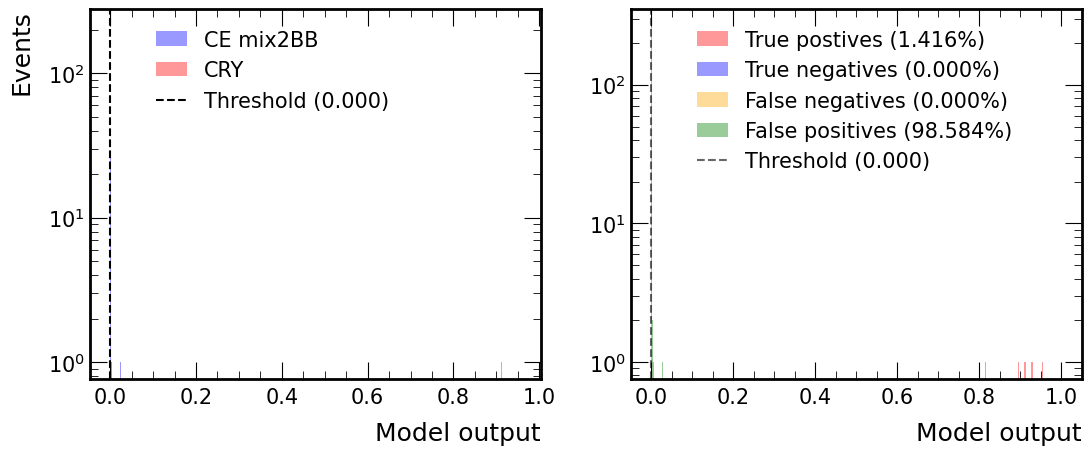

In [57]:
# Get test scores 
test_scores = model.predict_proba(X_test_scaled)[:, 1]

# Separate scores by true label
signal_scores = test_scores[y_test == 1]  # True signal (CRY)
background_scores = test_scores[y_test == 0]  # True background (CE mix)

# Discrimination threshold
threshold = optimal_threshold

# Get false positives and false negatives
false_positives = background_scores[background_scores > threshold]
false_negatives = signal_scores[signal_scores <= threshold]

# Also get true positives and true negatives for comparison
true_positives = signal_scores[signal_scores > threshold]
true_negatives = background_scores[background_scores <= threshold]

tot = len(test_scores)

# Plot score distributions
fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 4.8))

ax[0].hist(background_scores, bins=100, alpha=0.4, label='CE mix2BB',
         density=False, color='blue')
ax[0].hist(signal_scores, bins=100, alpha=0.4, label='CRY',
         density=False, color='red')
ax[0].axvline(optimal_threshold, color='black', linestyle='--', linewidth=1.5, label=f"Threshold ({optimal_threshold:.3f})")


ax[0].set_xlabel('Model output')
ax[0].set_ylabel('Events')
ax[0].legend(loc="upper left", bbox_to_anchor=(0.1, 1))
ax[0].set_yscale('log')


ax[1].hist(true_positives, bins=50, alpha=0.4, label=f'True postives ({len(true_positives)*100/tot:.3f}%)', color='red')
ax[1].hist(true_negatives, bins=50, alpha=0.4, label=f'True negatives ({len(true_negatives)*100/tot:.3f}%)', color='blue')
ax[1].hist(false_negatives, bins=50, alpha=0.4, label=f'False negatives ({len(false_negatives)*100/tot:.3f}%)', color='orange')
ax[1].hist(false_positives, bins=50, alpha=0.4, label=f'False positives ({len(false_positives)*100/tot:.3f}%)', color='green')
ax[1].axvline(optimal_threshold, color='black', linestyle='--', linewidth=1.5, alpha=0.6, label=f"Threshold ({optimal_threshold:.3f})")


ax[1].set_xlabel('Model output')
ax[1].legend(loc="upper left", bbox_to_anchor=(0.1, 1))
ax[1].set_yscale('log')


out_name = img_validation_out_path / "h1o_1x2_model_output.png"
# plt.savefig(out_name)


plt.show()


In [ ]:
X_test_scaled

	Wrote ../../../output/images/ml/veto/test/xgboost/validation/features_output.png


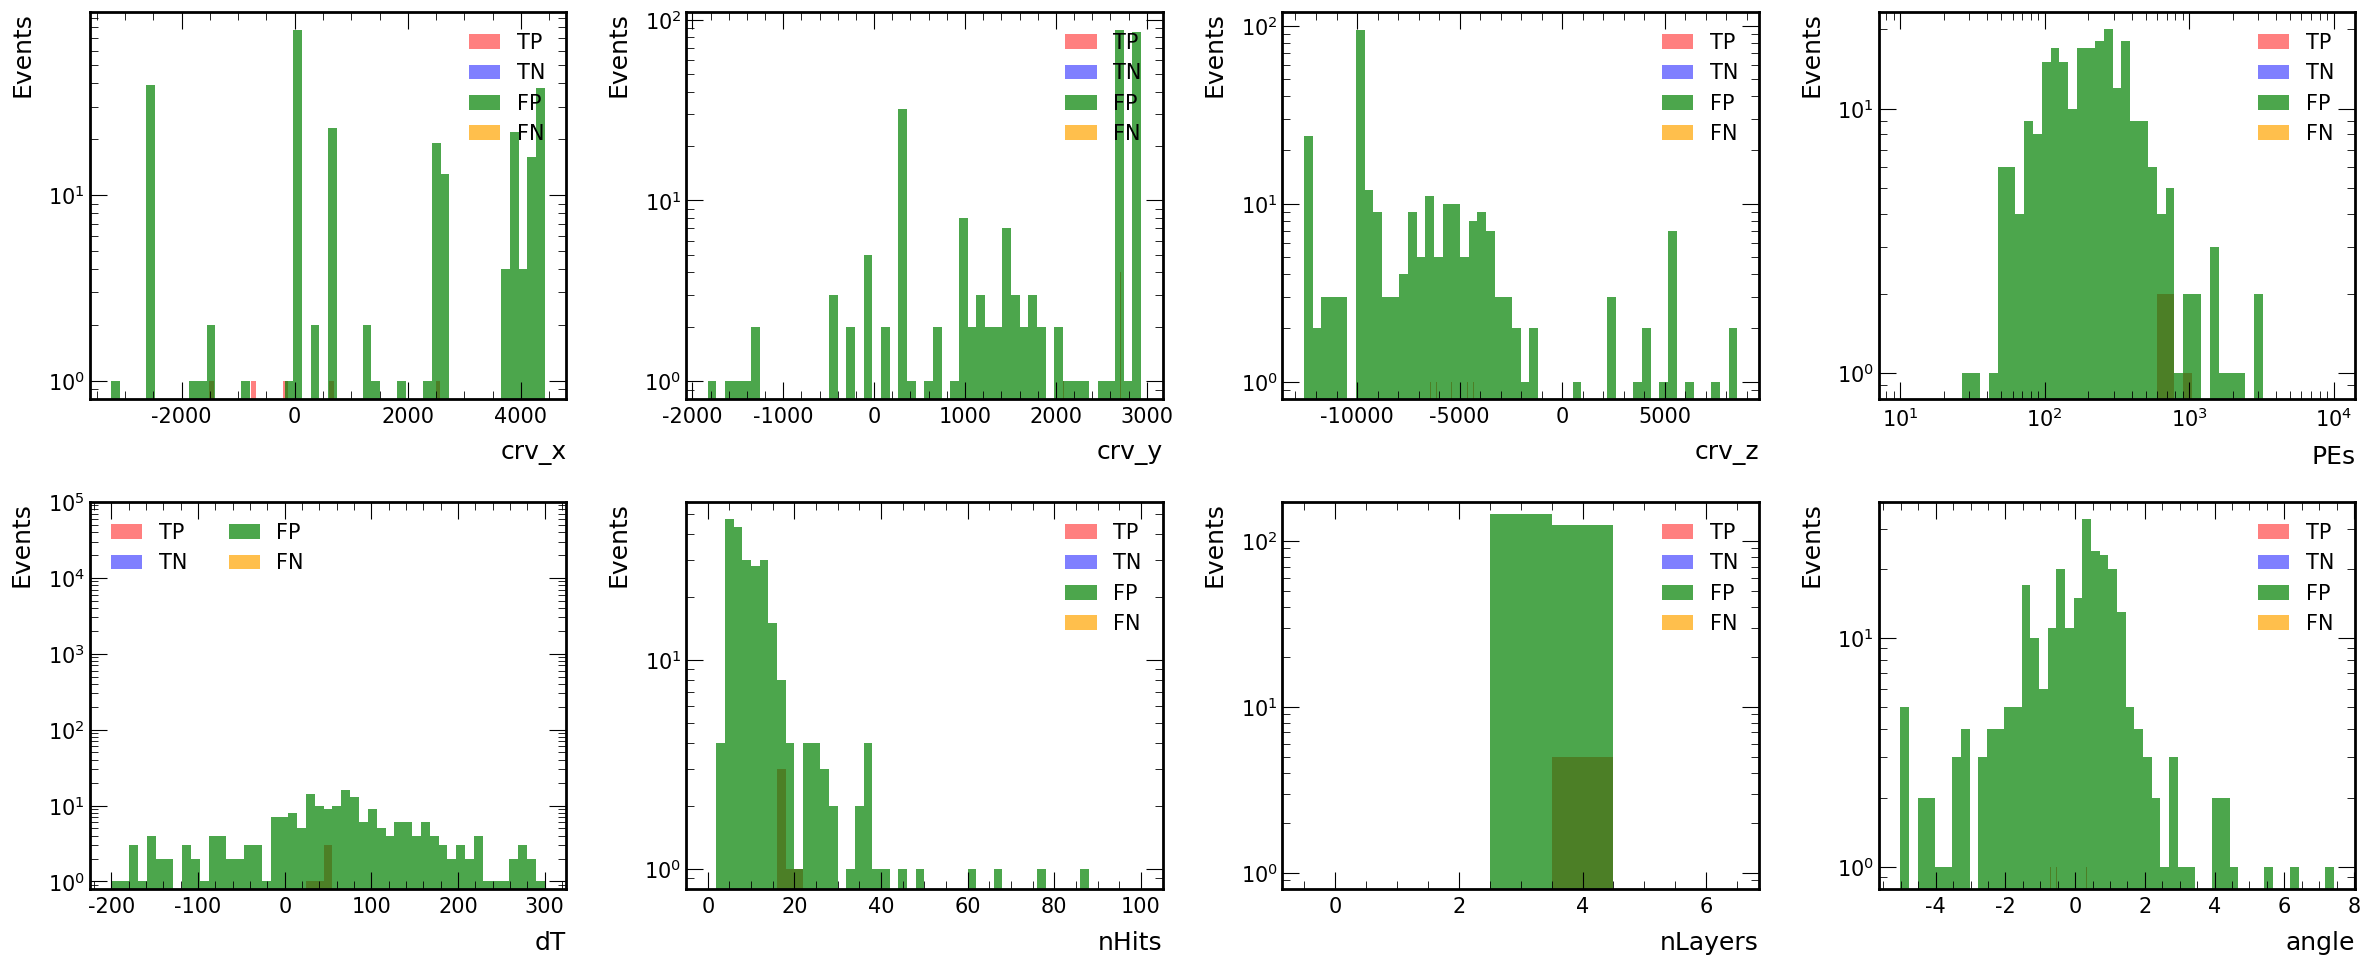

In [58]:
# Create a grid of subplots: 2 rows x 4 columns
n_features = len(feature_names)
n_rows = 2
n_cols = 4

y_pred_label = (test_scores > threshold).astype(int)
# Boolean masks
tp_mask = (y_test == 1) & (y_pred_label == 1)
tn_mask = (y_test == 0) & (y_pred_label == 0)
fp_mask = (y_test == 0) & (y_pred_label == 1)
fn_mask = (y_test == 1) & (y_pred_label == 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*5))
axes = axes.flatten()

for idx, feature in enumerate(feature_names):
    ax = axes[idx]
    
    # Set appropriate binning for each feature
    if feature == 'nLayers':
        # Discrete integer bins for layers (0, 1, 2, 3, 4, 5, 6)
        bins = np.arange(-0.5, 7.5, 1)
    elif feature == 'nHits':
        # Better resolution for hits
        bins = np.linspace(0, 100, 51)
    elif feature == 'PEs':
        # Log-spaced bins for PEs
        bins = np.logspace(np.log10(10), np.log10(10000), 50)
    elif feature in ['crv_x', 'crv_y', 'crv_z']:
        # Position features
        bins = 50
    elif feature == 'angle':
        bins = 50
    elif feature == 'dT':
        bins = np.linspace(-200, 300, 50)
    else:
        bins = 50
    
    ax.hist(X_test[feature][tp_mask], bins=bins, color='red', alpha=0.5, label='TP')
    ax.hist(X_test[feature][tn_mask], bins=bins, color='blue', alpha=0.5, label='TN')
    ax.hist(X_test[feature][fp_mask], bins=bins, color='green', alpha=0.7, label='FP')
    ax.hist(X_test[feature][fn_mask], bins=bins, color='orange', alpha=0.7, label='FN')
    
    xlabel = feature
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Events')
    ax.set_yscale('log')
    
    # Use log x-scale for PEs
    if feature == 'PEs':
        ax.set_xscale('log')
    
    # Set appropriate y-limits to avoid cramped plots
    if feature == 'dT':
        # Higher upper limit for dT to fit legend with 2 columns
        ax.set_ylim(bottom=0.8, top=1e5)
        ax.legend(loc='upper left', framealpha=0.9, ncol=2)
    else:
        ax.set_ylim(bottom=0.8, top=None)
        # Better legend positioning - upper right for most, adjust for specific features
        if feature in ['nLayers', 'crv_x']:
            ax.legend(loc='upper right', framealpha=0.9)
        else:
            ax.legend(loc='upper right', framealpha=0.9)

# Hide unused subplots
for idx in range(len(feature_names), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()

out_name = img_validation_out_path / "features_output.png" 
plt.savefig(out_name)
print(f"\tWrote {out_name}")

plt.show()

In [ ]:
# true_positives.keys()


✅ Confusion matrix saved to ../../../output/images/ml/veto/test/xgboost/validation/confusion_matrix.png


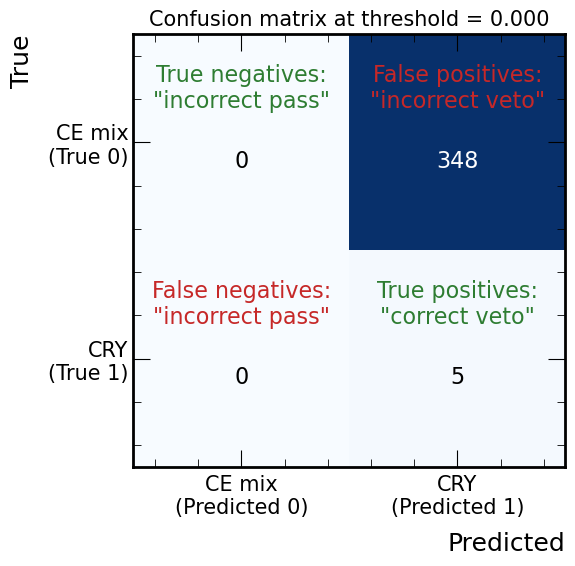

In [60]:
# Visualize confusion matrix with counts and percentages
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Use optimal threshold
y_pred_optimal = (y_test_pred_proba > optimal_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred_optimal)
tn, fp, fn, tp = cm.ravel()

# Create custom confusion matrix plot
fig, ax = plt.subplots(figsize=(8, 6))

# Display the confusion matrix as an image
# Try these colormap alternatives:
# 'Blues', 'Greens', 'Purples', 'Oranges', 'Greys'
# 'YlOrRd', 'YlGnBu', 'RdPu', 'BuPu', 'GnBu'
# 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
im = ax.imshow(cm, interpolation="nearest", cmap="Blues")

# Set ticks and labels
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['CE mix\n(Predicted 0)', 'CRY\n(Predicted 1)'])
ax.set_yticklabels(['CE mix\n(True 0)', 'CRY\n(True 1)'])

ax.set_xlabel('Predicted') # , fontsize=12, fontweight='bold')
ax.set_ylabel('True') # , fontsize=12, fontweight='bold')
ax.set_title(f'Confusion matrix at threshold = {optimal_threshold:.3f}') # , fontsize=13, fontweight='bold')

# Calculate percentages (normalised by row - by true label)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Add text annotations with both counts and percentages
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        count = cm[i, j]
        percentage = cm_norm[i, j] * 100
        
        # Determine if we need white or black text
        text_color = "white" if cm[i, j] > thresh else "black"
        
        # Add interpretation labels at top
        if i == 0 and j == 0:  # TN
            label = 'True negatives:\n"incorrect pass"'
            label_color = '#2E7D32'  # Dark green
        elif i == 0 and j == 1:  # FP
            label = 'False positives:\n"incorrect veto"'
            label_color = '#C62828'  # Dark red
        elif i == 1 and j == 0:  # FN
            label = 'False negatives:\n"incorrect pass"'
            label_color = '#C62828'  # Dark red
        else:  # TP
            label = 'True positives:\n"correct veto"'
            label_color = '#2E7D32'  # Gold/yellow for visibility
        
        ax.text(j, i - 0.25, label,
                ha="center", va="center",
                color=label_color, fontsize=16) # , fontweight='bold')
        
        # Count and percentage below
        ax.text(j, i + 0.15, f'{count:,}\n',
                ha="center", va="center",
                color=text_color, fontsize=16)
                #, fontweight='bold')

plt.tight_layout()

out_name = img_validation_out_path / "confusion_matrix.png"
plt.savefig(out_name) # , dpi=150, bbox_inches='tight')
print(f"\n✅ Confusion matrix saved to {out_name}")

plt.show()

In [67]:
# # ==========================================
# # SAVE CRV VETO METRICS TO CSV
# # ==========================================

# # Create results directory
# results_out_path = Path(f"../../../output/ml/veto/xgboost/{run}/results")
# results_out_path.mkdir(parents=True, exist_ok=True)

# # Calculate all metrics
# metrics_data = {
#     'Metric': [
#         'Veto efficiency (Pure CRY)',
#         'Veto inefficiency (Pure CRY)', 
#         'CE mix veto rate (Additional deadtime)',
#         'CE mix pass rate',
#         'Veto purity',
#         'Overall accuracy'
#     ],
#     'Formula': [
#         'TP / (TP + FN)',
#         'FN / (TP + FN)',
#         'FP / (TN + FP)',
#         'TN / (TN + FP)',
#         'TP / (TP + FP)',
#         '(TP + TN) / (TP + TN + FP + FN)'
#     ],
#     'Value': [
#         veto_efficiency,
#         veto_inefficiency,
#         deadtime_loss,
#         1 - deadtime_loss,  # CE Mix Pass Rate = 1 - deadtime
#         veto_purity,
#         (tp + tn) / (tp + tn + fp + fn)
#     ],
#     'Description': [
#         'Fraction of pure cosmic rays vetoed',
#         'Fraction of pure cosmic rays passed',
#         'Fraction of CE mix events vetoed (deadtime)',
#         'Fraction of CE mix events passed',
#         'Of all vetoed events, fraction that are pure cosmics',
#         'Overall correct classification rate'
#     ]
# }

# # Add confusion matrix counts
# confusion_data = {
#     'Metric': ['True Positives (TP)', 'True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)'],
#     'Count': [int(tp), int(tn), int(fp), int(fn)],
#     'Description': [
#         'Pure CRY correctly vetoed',
#         'CE mix correctly passed',
#         'CE mix incorrectly vetoed',
#         'Pure CRY incorrectly passed'
#     ]
# }

# # Create DataFrames
# metrics_df = pd.DataFrame(metrics_data)
# confusion_df = pd.DataFrame(confusion_data)

# # Save to CSV files
# metrics_file_path = results_out_path / "crv_metrics_results.csv"
# confusion_file_path = results_out_path / "confusion_matrix_counts.csv"

# metrics_df.to_csv(metrics_file_path, index=False, float_format='%.6f')
# confusion_df.to_csv(confusion_file_path, index=False)

# print(f"\n✅ CRV metrics saved to:")
# print(f"   {metrics_file_path}")
# print(f"   {confusion_file_path}")

# # Display the results
# print("\n" + "="*80)
# print("CRV VETO METRICS SUMMARY")
# print("="*80)
# display(metrics_df)

# print("\n" + "="*80)
# print("CONFUSION MATRIX COUNTS")
# print("="*80)
# display(confusion_df)


In [62]:
# ==========================================
# CRV VETO PERFORMANCE METRICS
# ==========================================

# LABELS:
#   Label 1 (CRY): Pure cosmic sample - want to VETO
#   Label 0 (CE mix): Mixed CE sample (true CE + pileup cosmics) - want to PASS
#
# PHYSICS GOAL:
#   VETO: Pure cosmic rays (out-of-time backgrounds)
#   PASS: Entire CE mix sample (CE signal + pileup cosmics)
#   
#   Why pass pileup cosmics? Vetoing them inflates deadtime without benefit!

# Get predictions at optimal threshold
y_pred_veto = (y_test_pred_proba > optimal_threshold).astype(int)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_veto)
tn, fp, fn, tp = cm.ravel()

# Core veto metrics
veto_efficiency = tp / (tp + fn)  # Fraction of pure cosmics caught
veto_inefficiency = fn / (tp + fn)  # Fraction of pure cosmics that leak through
deadtime_loss = fp / (tn + fp)  # Fraction of CE mix incorrectly vetoed
veto_purity = tp / (tp + fp) if (tp + fp) > 0 else 0  # Of vetoed events, fraction that are pure cosmics

In [64]:
# ==========================================
# SAVE CRV VETO METRICS TO CSV
# ==========================================

# Create results directory
results_out_path = Path(f"../../../output/ml/veto/xgboost/{run}/results")
results_out_path.mkdir(parents=True, exist_ok=True)

# Calculate all metrics
metrics_data = {
    'Metric': [
        'Veto efficiency (Pure CRY)',
        'Veto inefficiency (Pure CRY)', 
        'CE mix veto rate (Additional deadtime)',
        'CE mix pass rate',
        'Veto purity',
        'Overall accuracy'
    ],
    'Formula': [
        'TP / (TP + FN)',
        'FN / (TP + FN)',
        'FP / (TN + FP)',
        'TN / (TN + FP)',
        'TP / (TP + FP)',
        '(TP + TN) / (TP + TN + FP + FN)'
    ],
    'Value': [
        veto_efficiency,
        veto_inefficiency,
        deadtime_loss,
        1 - deadtime_loss,  # CE Mix Pass Rate = 1 - deadtime
        veto_purity,
        (tp + tn) / (tp + tn + fp + fn)
    ],
    'Description': [
        'Fraction of pure cosmic rays vetoed',
        'Fraction of pure cosmic rays passed',
        'Fraction of CE mix events vetoed (deadtime)',
        'Fraction of CE mix events passed',
        'Of all vetoed events, fraction that are pure cosmics',
        'Overall correct classification rate'
    ]
}

# Add confusion matrix counts
confusion_data = {
    'Metric': ['True Positives (TP)', 'True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)'],
    'Count': [int(tp), int(tn), int(fp), int(fn)],
    'Description': [
        'Pure CRY correctly vetoed',
        'CE mix correctly passed',
        'CE mix incorrectly vetoed',
        'Pure CRY incorrectly passed'
    ]
}

# Create DataFrames
metrics_df = pd.DataFrame(metrics_data)
confusion_df = pd.DataFrame(confusion_data)

# Save to CSV files
metrics_file_path = results_out_path / "crv_metrics_results.csv"
confusion_file_path = results_out_path / "confusion_matrix_counts.csv"

metrics_df.to_csv(metrics_file_path, index=False, float_format='%.6f')
confusion_df.to_csv(confusion_file_path, index=False)

print(f"\n✅ CRV metrics saved to:")
print(f"   {metrics_file_path}")
print(f"   {confusion_file_path}")

# Display the results
print("\n" + "="*80)
print("CRV VETO METRICS SUMMARY")
print("="*80)
display(metrics_df)

print("\n" + "="*80)
print("CONFUSION MATRIX COUNTS")
print("="*80)
display(confusion_df)



✅ CRV metrics saved to:
   ../../../output/ml/veto/xgboost/test/results/crv_metrics_results.csv
   ../../../output/ml/veto/xgboost/test/results/confusion_matrix_counts.csv

CRV VETO METRICS SUMMARY


,Metric,Formula,Value,Description
0,Veto efficiency (Pure CRY),TP / (TP + FN),1.000000,Fraction of pure cosmic rays vetoed
1,Veto inefficiency (Pure CRY),FN / (TP + FN),0.000000,Fraction of pure cosmic rays passed
2,CE mix veto rate (Additional deadtime),FP / (TN + FP),1.000000,Fraction of CE mix events vetoed (deadtime)
3,CE mix pass rate,TN / (TN + FP),0.000000,Fraction of CE mix events passed
4,Veto purity,TP / (TP + FP),0.014164,"Of all vetoed events, fraction that are pure c..."
5,Overall accuracy,(TP + TN) / (TP + TN + FP + FN),1.000000,Overall correct classification rate



CONFUSION MATRIX COUNTS


,Metric,Count,Description
0,True Positives (TP),5,Pure CRY correctly vetoed
1,True Negatives (TN),348,CE mix correctly passed
2,False Positives (FP),0,CE mix incorrectly vetoed
3,False Negatives (FN),0,Pure CRY incorrectly passed


In [65]:
# ==========================================
# SIMPLE dT CUT COMPARISON
# ==========================================
# Apply traditional veto window: -25 < dT < 150 ns
# If dT is in this window, predict it's a cosmic (label 1)

# Get dT values from test set! This is 20%, so expect 20% unvetoed events compared to conventional analysis
dT_test = X_test['dT'].values

# Apply simple cut: veto if dT in [-25, 150]
y_pred_dt_cut = ((dT_test >= -25) & (dT_test <= 150)).astype(int)

# # Get dT values from test set
# dT = X['dT'].values

# # Apply simple cut: veto if dT in [-25, 150]
# y_pred_dt_cut = ((dT >= -25) & (dT <= 150)).astype(int)




# Calculate confusion matrix for dT cut
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt_cut)
tn_dt, fp_dt, fn_dt, tp_dt = cm_dt.ravel()

# Calculate metrics for dT cut
veto_efficiency_dt = tp_dt / (tp_dt + fn_dt)
veto_inefficiency_dt = fn_dt / (tp_dt + fn_dt)
deadtime_loss_dt = fp_dt / (tn_dt + fp_dt)
veto_purity_dt = tp_dt / (tp_dt + fp_dt) if (tp_dt + fp_dt) > 0 else 0

# Create comprehensive "money table" with ALL metrics
print("\n" + "="*80)
print("PERFORMANCE COMPARISON: ML MODEL vs SIMPLE dT CUT")
print("="*80)

# Calculate all metrics for both approaches
ml_pass_rate = 1 - deadtime_loss
dt_pass_rate = 1 - deadtime_loss_dt
ml_accuracy = (tp + tn) / (tp + tn + fp + fn)
dt_accuracy = (tp_dt + tn_dt) / (tp_dt + tn_dt + fp_dt + fn_dt)
ml_fom = veto_efficiency * (1 - deadtime_loss)
dt_fom = veto_efficiency_dt * (1 - deadtime_loss_dt)

# Complete metrics comparison table
metrics_comparison_df = pd.DataFrame({
    'Metric': [
        'Veto efficiency',
        # 'Veto inefficiency (Pure CRY)',
        'Deadtime',
        # 'CE mix pass rate',
        'Veto purity',
        'Overall accuracy',
        'Figure of merit'
    ],
    'ML model': [
        f"{veto_efficiency*100:.3f}%",
        # f"{veto_inefficiency*100:.2f}%",
        f"{deadtime_loss*100:.3f}%",
        # f"{ml_pass_rate*100:.2f}%",
        f"{veto_purity*100:.3f}%",
        f"{ml_accuracy*100:.3f}%",
        f"{ml_fom*100:.3f}%"
    ],
    'dT cut [-25, 150] ns': [
        f"{veto_efficiency_dt*100:.3f}%",
        # f"{veto_inefficiency_dt*100:.2f}%",
        f"{deadtime_loss_dt*100:.3f}%",
        # f"{dt_pass_rate*100:.2f}%",
        f"{veto_purity_dt*100:.3f}%",
        f"{dt_accuracy*100:.3f}%",
        f"{dt_fom*100:.3f}%"
    ],
    'Difference': [
        f"{(veto_efficiency - veto_efficiency_dt)*100:+.3f}%",
        # f"{(veto_inefficiency - veto_inefficiency_dt)*100:+.2f}%",
        f"{(deadtime_loss - deadtime_loss_dt)*100:+.3f}%",
        # f"{(ml_pass_rate - dt_pass_rate)*100:+.2f}%",
        f"{(veto_purity - veto_purity_dt)*100:+.3f}%",
        f"{(ml_accuracy - dt_accuracy)*100:+.3f}%",
        f"{(ml_fom - dt_fom)*100:+.3f}%"
    ],
    'Description': [
        'Fraction of cosmics vetoed',
        # 'Fraction of pure cosmic rays passed (contamination)',
        'Fraction of pileup vetoed',
        # 'Fraction of CE mix events passed',
        'Of all vetoed events, fraction that are cosmics',
        'Overall correct classification rate',
        'eff_veto * (1 - deadtime)'
    ]
})

# Confusion matrix comparison
confusion_comparison_df = pd.DataFrame({
    'Category': [
        'True Positives (CRY vetoed)',
        'True Negatives (CE mix passed)',
        'False Positives (CE mix vetoed)',
        'False Negatives (CRY passed)'
    ],
    'ML model': [tp, tn, fp, fn],
    'dT cut': [tp_dt, tn_dt, fp_dt, fn_dt],
    'Difference': [tp - tp_dt, tn - tn_dt, fp - fp_dt, fn - fn_dt]
})

print("\n📊 COMPLETE PERFORMANCE METRICS COMPARISON:")
display(metrics_comparison_df)

print("\n📈 Confusion Matrix Counts:")
display(confusion_comparison_df)

# Save to CSV files
metrics_file_path = results_out_path / "crv_metrics_comparison_money_table.csv"
confusion_file_path = results_out_path / "confusion_matrix_comparison_counts.csv"

metrics_comparison_df.to_csv(metrics_file_path, index=False)
confusion_comparison_df.to_csv(confusion_file_path, index=False)

print(f"\n✅ CRV metrics saved to:")
print(f"   {metrics_file_path}")
print(f"   {confusion_file_path}")

print("\n" + "="*80)
print("KEY FINDINGS")
print("="*80)

# Veto efficiency comparison
print(f"\nVeto efficiency (catching pure CRY):")
print(f"   ML: {tp:,}/{tp+fn:,} CRY vetoed ({veto_efficiency*100:.2f}%)")
print(f"   dT: {tp_dt:,}/{tp_dt+fn_dt:,} CRY vetoed ({veto_efficiency_dt*100:.2f}%)")
print(f"   → ML catches {tp - tp_dt:,} {'fewer' if tp < tp_dt else 'more'} CRY events ({(veto_efficiency - veto_efficiency_dt)*100:+.2f}%)")

# CRY leakage comparison
print(f"\nCRY leakage (contamination):")
print(f"   ML: {fn:,} CRY leaked ({veto_inefficiency*100:.4f}%)")
print(f"   dT: {fn_dt:,} CRY leaked ({veto_inefficiency_dt*100:.4f}%)")
print(f"   → ML leaks {abs(fn - fn_dt):,} {'fewer' if fn < fn_dt else 'more'} CRY events ({(veto_inefficiency - veto_inefficiency_dt)*100:+.4f}%)")

# Deadtime comparison
print(f"\nAdditional deadtime (CE mix incorrectly vetoed):")
print(f"   ML: {fp:,}/{fp+tn:,} CE mix vetoed ({deadtime_loss*100:.2f}%)")
print(f"   dT: {fp_dt:,}/{fp_dt+tn_dt:,} CE mix vetoed ({deadtime_loss_dt*100:.2f}%)")
print(f"   → ML vetoes {abs(fp - fp_dt):,} {'fewer' if fp < fp_dt else 'more'} CE mix events ({(deadtime_loss - deadtime_loss_dt)*100:+.2f}%)")

# Overall trade-off
print(f"\nTrade-off summary:")
print(f"   ML sacrifices {abs(tp - tp_dt):,} CRY vetoes")
print(f"   To gain {abs(tn - tn_dt):,} CE mix passes")
print(f"   Net benefit: {abs(deadtime_loss - deadtime_loss_dt)*100:.1f}% deadtime reduction vs {abs(veto_efficiency - veto_efficiency_dt)*100:.3f}% efficiency loss")

print("="*80)


PERFORMANCE COMPARISON: ML MODEL vs SIMPLE dT CUT

📊 COMPLETE PERFORMANCE METRICS COMPARISON:


,Metric,ML model,"dT cut [-25, 150] ns",Difference,Description
0,Veto efficiency,100.000%,100.000%,+0.000%,Fraction of cosmics vetoed
1,Deadtime,100.000%,39.368%,+60.632%,Fraction of pileup vetoed
2,Veto purity,1.416%,3.521%,-2.105%,"Of all vetoed events, fraction that are cosmics"
3,Overall accuracy,100.000%,61.190%,+38.810%,Overall correct classification rate
4,Figure of merit,0.000%,60.632%,-60.632%,eff_veto * (1 - deadtime)



📈 Confusion Matrix Counts:


,Category,ML model,dT cut,Difference
0,True Positives (CRY vetoed),5,5,0
1,True Negatives (CE mix passed),348,211,137
2,False Positives (CE mix vetoed),0,137,-137
3,False Negatives (CRY passed),0,0,0



✅ CRV metrics saved to:
   ../../../output/ml/veto/xgboost/test/results/crv_metrics_comparison_money_table.csv
   ../../../output/ml/veto/xgboost/test/results/confusion_matrix_comparison_counts.csv

KEY FINDINGS

Veto efficiency (catching pure CRY):
   ML: 5/5 CRY vetoed (100.00%)
   dT: 5/5 CRY vetoed (100.00%)
   → ML catches 0 more CRY events (+0.00%)

CRY leakage (contamination):
   ML: 0 CRY leaked (0.0000%)
   dT: 0 CRY leaked (0.0000%)
   → ML leaks 0 more CRY events (+0.0000%)

Additional deadtime (CE mix incorrectly vetoed):
   ML: 0/348 CE mix vetoed (100.00%)
   dT: 137/348 CE mix vetoed (39.37%)
   → ML vetoes 137 fewer CE mix events (+60.63%)

Trade-off summary:
   ML sacrifices 0 CRY vetoes
   To gain 137 CE mix passes
   Net benefit: 60.6% deadtime reduction vs 0.000% efficiency loss


## CRV Veto Performance Metrics

**Physics context**: Veto pure cosmic rays while preserving the CE beam sample.

### Key insight:
The CE mix2BB sample contains:
- True CE signal coincidences 
- Pileup-induced cosmic coincidences

**We want to PASS THROUGH the entire CE mix sample** (both CE signal + pileup cosmics) because:
- Vetoing pileup cosmics = unnecessary deadtime inflation
- Pileup cosmics in CE mix don't contaminate the physics signal the same way pure cosmics do

### Training strategy:
- **Label 1 (CRY)**: Pure cosmic sample → VETO these
- **Label 0 (CE mix)**: Mixed CE sample → PASS these (accept both CE + pileup)

### Model performance metrics:
- **Veto Efficiency (ε_veto)**: Fraction of pure cosmic rays correctly vetoed
- **Veto Inefficiency (1 - ε_veto)**: Fraction of pure cosmic rays that slip through (contamination)
- **Deadtime**: Fraction of CE mix events incorrectly vetoed (pure loss)
- **Veto Purity**: Of vetoed events, what fraction are truly from pure cosmic sample

In [ ]:
# ==========================================
# CRV VETO PERFORMANCE METRICS
# ==========================================

# LABELS:
#   Label 1 (CRY): Pure cosmic sample - want to VETO
#   Label 0 (CE mix): Mixed CE sample (true CE + pileup cosmics) - want to PASS
#
# PHYSICS GOAL:
#   VETO: Pure cosmic rays (out-of-time backgrounds)
#   PASS: Entire CE mix sample (CE signal + pileup cosmics)
#   
#   Why pass pileup cosmics? Vetoing them inflates deadtime without benefit!

# Get predictions at optimal threshold
y_pred_veto = (y_test_pred_proba > optimal_threshold).astype(int)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_veto)
tn, fp, fn, tp = cm.ravel()

# INTERPRETATION:
# TP (True Positives)  = Pure CRY correctly vetoed → GOOD ✓
# FN (False Negatives) = Pure CRY missed (passed through) → BAD ✗ (contamination!)
# TN (True Negatives)  = CE mix passed through → GOOD ✓ (desired behavior)
# FP (False Positives) = CE mix incorrectly vetoed → BAD ✗ (deadtime inflation!)

print("\n" + "="*80)
print("CRV VETO PERFORMANCE @ OPTIMAL THRESHOLD")
print("="*80)

# Core veto metrics
veto_efficiency = tp / (tp + fn)  # Fraction of pure cosmics caught
veto_inefficiency = fn / (tp + fn)  # Fraction of pure cosmics that leak through
deadtime_loss = fp / (tn + fp)  # Fraction of CE mix incorrectly vetoed
veto_purity = tp / (tp + fp) if (tp + fp) > 0 else 0  # Of vetoed events, fraction that are pure cosmics

print(f"\n📊 VETO EFFICIENCY (Pure Cosmic Rejection):")
print(f"   Pure CRY correctly vetoed (TP):   {tp:,} / {tp+fn:,}")
print(f"   Veto Efficiency (ε_veto):         {veto_efficiency:.4f} ({veto_efficiency*100:.2f}%)")
print(f"   Veto Inefficiency (1-ε_veto):     {veto_inefficiency:.6f} ({veto_inefficiency*100:.4f}%)")
print(f"   → Cosmic contamination = {veto_inefficiency:.2e}")
print(f"\n   ⚠️  These pure cosmics contaminate your sample!")

print(f"\n⏱️  DEADTIME (CE Mix Incorrectly Vetoed):")
print(f"   CE mix correctly passed (TN):     {tn:,} / {tn+fp:,}")
print(f"   CE mix incorrectly vetoed (FP):   {fp:,} / {tn+fp:,}")
print(f"   Deadtime fraction:                {deadtime_loss:.4f} ({deadtime_loss*100:.2f}%)")
print(f"\n   ⚠️  Vetoing CE mix = pure deadtime loss!")
print(f"       (includes both true CE + pileup cosmics - both undesirable to veto)")

print(f"\n✅ VETO PURITY:")
print(f"   Total events vetoed:              {tp+fp:,}")
print(f"   - Pure CRY (good veto):           {tp:,} ({tp/(tp+fp)*100:.1f}%)")
print(f"   - CE mix (bad veto/deadtime):     {fp:,} ({fp/(tp+fp)*100:.1f}%)")
print(f"   Veto purity:                      {veto_purity:.4f} ({veto_purity*100:.2f}%)")

print(f"\n⚡ SUMMARY:")
print(f"   Total test events:                {len(y_test):,}")
print(f"   Correctly classified:             {tp+tn:,} ({(tp+tn)/len(y_test)*100:.1f}%)")
print(f"   Misclassified:                    {fp+fn:,} ({(fp+fn)/len(y_test)*100:.1f}%)")
print(f"     - Contamination (FN):           {fn:,} (pure cosmics leaked)")
print(f"     - Deadtime (FP):                {fp:,} (CE mix wrongly vetoed)")

print("="*70)

In [66]:
# ==========================================
# SAVE CRV VETO METRICS TO CSV
# ==========================================

# Create results directory
results_out_path = Path(f"../../../output/ml/veto/xgboost/{run}/results")
results_out_path.mkdir(parents=True, exist_ok=True)

# Calculate all metrics
metrics_data = {
    'Metric': [
        'Veto efficiency (Pure CRY)',
        'Veto inefficiency (Pure CRY)', 
        'CE mix veto rate (Additional deadtime)',
        'CE mix pass rate',
        'Veto purity',
        'Overall accuracy'
    ],
    'Formula': [
        'TP / (TP + FN)',
        'FN / (TP + FN)',
        'FP / (TN + FP)',
        'TN / (TN + FP)',
        'TP / (TP + FP)',
        '(TP + TN) / (TP + TN + FP + FN)'
    ],
    'Value': [
        veto_efficiency,
        veto_inefficiency,
        deadtime_loss,
        1 - deadtime_loss,  # CE Mix Pass Rate = 1 - deadtime
        veto_purity,
        (tp + tn) / (tp + tn + fp + fn)
    ],
    'Description': [
        'Fraction of pure cosmic rays successfully vetoed',
        'Fraction of pure cosmic rays that slip through (contamination)',
        'Fraction of CE mix events vetoed (deadtime)',
        'Fraction of CE mix events passed through (preserved beam data)',
        'Of all vetoed events, fraction that are pure cosmics',
        'Overall correct classification rate'
    ]
}

# Add confusion matrix counts
confusion_data = {
    'Metric': ['True Positives (TP)', 'True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)'],
    'Count': [int(tp), int(tn), int(fp), int(fn)],
    'Description': [
        'Pure CRY correctly vetoed',
        'CE mix correctly passed',
        'CE mix incorrectly vetoed (additional deadtime)',
        'Pure CRY incorrectly passed (contamination)'
    ]
}

# Create DataFrames
metrics_df = pd.DataFrame(metrics_data)
confusion_df = pd.DataFrame(confusion_data)

# Save to CSV files
metrics_file_path = results_out_path / "crv_metrics_results.csv"
confusion_file_path = results_out_path / "confusion_matrix_counts.csv"

metrics_df.to_csv(metrics_file_path, index=False, float_format='%.6f')
confusion_df.to_csv(confusion_file_path, index=False)

print(f"\n✅ CRV metrics saved to:")
print(f"   {metrics_file_path}")
print(f"   {confusion_file_path}")

# Display the results
print("\n" + "="*80)
print("CRV VETO METRICS SUMMARY")
print("="*80)
display(metrics_df)

print("\n" + "="*80)
print("CONFUSION MATRIX COUNTS")
print("="*80)
display(confusion_df)



✅ CRV metrics saved to:
   ../../../output/ml/veto/xgboost/test/results/crv_metrics_results.csv
   ../../../output/ml/veto/xgboost/test/results/confusion_matrix_counts.csv

CRV VETO METRICS SUMMARY


,Metric,Formula,Value,Description
0,Veto efficiency (Pure CRY),TP / (TP + FN),1.000000,Fraction of pure cosmic rays successfully vetoed
1,Veto inefficiency (Pure CRY),FN / (TP + FN),0.000000,Fraction of pure cosmic rays that slip through...
2,CE mix veto rate (Additional deadtime),FP / (TN + FP),1.000000,Fraction of CE mix events vetoed (deadtime)
3,CE mix pass rate,TN / (TN + FP),0.000000,Fraction of CE mix events passed through (pres...
4,Veto purity,TP / (TP + FP),0.014164,"Of all vetoed events, fraction that are pure c..."
5,Overall accuracy,(TP + TN) / (TP + TN + FP + FN),1.000000,Overall correct classification rate



CONFUSION MATRIX COUNTS


,Metric,Count,Description
0,True Positives (TP),5,Pure CRY correctly vetoed
1,True Negatives (TN),348,CE mix correctly passed
2,False Positives (FP),0,CE mix incorrectly vetoed (additional deadtime)
3,False Negatives (FN),0,Pure CRY incorrectly passed (contamination)
